# Chapter 7 - The SARIMA Model

## Listing 7-1. Importing the data and creating a plot

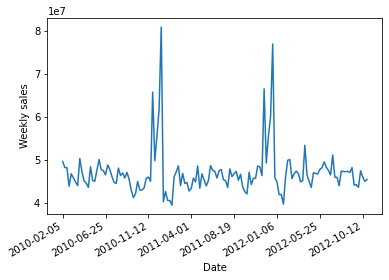

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
data = data.groupby('Date').sum()
ax = data['Weekly_Sales'].plot()
ax.set_ylabel('Weekly sales')
plt.gcf().autofmt_xdate()
plt.show()


In [8]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,2956
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0


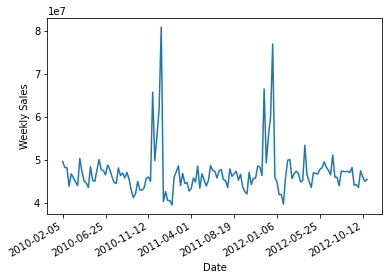

In [2]:
data = data.groupby('Date').sum()
data['IsHoliday'] = data['IsHoliday'] > 0
data['IsHoliday'] = data['IsHoliday'].apply(
    lambda x: float(x)
)

ax = data['Weekly_Sales'].plot()
ax.set_ylabel('Weekly Sales')
plt.gcf().autofmt_xdate()
plt.show()

In [3]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0.0
2010-02-12,65082,131179,48336677.63,1.0
2010-02-19,65610,131897,48276993.78,0.0
2010-02-26,65045,130161,43968571.13,0.0
2010-03-05,64897,129670,46871470.30,0.0


## Auto Select SARIMA Model

In [24]:
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from sklearn.metrics import r2_score
num=int(len(data)*0.2)
len(data)

143

In [36]:
sarima=auto_arima(data["Weekly_Sales"][:-10],start_p=1,m=52, seasonal=True,out_of_sample_size=num)

In [37]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  133
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 52)   Log Likelihood               -2224.614
Date:                              Sun, 05 Jun 2022   AIC                           4465.228
Time:                                      12:54:19   BIC                           4488.351
Sample:                                           0   HQIC                          4474.624
                                              - 133                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.956e+07   5.65e-09   5.23e+15      0.000    2.96e+07    2.96e+07
ar.L1         -0.7894      0.308     -2.561      0.010      -1.394      -0.185
ar.L2         -0.1406      0.765     -0.184      0.854      -1.639       1.358
ma.L1          1.2069      0.307      3.930      0.000       0.605       1.809
ma.L2          0.6236      0.537      1.162      0.245      -0.428       1.676
ar.S.L52       0.6759      0.134      5.047      0.000       0.413       0.938
ma.S.L52      -0.1111      0.334     -0.332      0.740      -0.766       0.544
sigma2      3.126e+13   2.78e-14   1.12e+27      0.000    3.13e+13    3.13e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               693.38
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.92
Prob(H) (two-sided):                  0.23   Kurtosis:                        13.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.51e+43. Standard errors may be unstable.
"""

# run the suggested model

In [41]:
import statsmodels.api as sm
sarima=sm.tsa.statespace.SARIMAX(endog=data['Weekly_Sales'][:-10],order=(2,0,2),seasonal_order=(1,0,1,52))
fit=sarima.fit(disp=False).forecast(steps=10)

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning

In [42]:
sarima2=sm.tsa.statespace.SARIMAX(endog=data['Weekly_Sales'][:-10],exog=data["IsHoliday"][:-10],order=(2,0,2),seasonal_order=(1,0,1,52))
fit2=sarima.fit(disp=False).forecast(steps=10,exog=data['IsHoliday'][-10:])

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning

# Import test dataset

In [43]:
test=data['Weekly_Sales'][-10:]

## Check the performance of the suggested data

In [44]:
test.head()

Date
2012-08-24    47447323.60
2012-08-31    47159639.43
2012-09-07    48330059.31
2012-09-14    44226038.65
2012-09-21    44354547.11
Name: Weekly_Sales, dtype: float64

In [46]:
r2_score(test,fit)

0.6771104763542369

In [48]:
r2_score(test,fit2)

0.6771104763542369

## Listing 7-2. Fitting a SARIMA(1,1,1)(1,1,1)52 model

In [ ]:
import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score

train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]
mod = sm.tsa.statespace.SARIMAX(data['Weekly_Sales'][:-10], order=(1,1,1), seasonal_order=(1,1,1,52))
res = mod.fit(disp=False)
fcst = res.forecast(steps=10)

plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(['Actual data', 'Forecast'])
plt.ylabel('Sales')
plt.xlabel('Test Data Time Step')
plt.show() 
r2_score(test, fcst)



## Listing 7-3. Fitting a SARIMA(1,1,1)(1,1,1)52 model

In [ ]:
scores = []
for p in range(2):
    for i in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):

                        try:
                            mod = sm.tsa.statespace.SARIMAX(train, order=(p,0,q), seasonal_order=(P,D,Q,52))
                            res = mod.fit(disp=False)
                            
                            score = [p,i,q,P,D,Q,r2_score(test, res.forecast(steps=10))]
                            print(score)
                            scores.append(score)
                            
                            del mod
                            del res
                            
                        except:
                            print('errored')

res = pd.DataFrame(scores)
res.columns = ['p', 'i', 'q', 'P', 'D', 'Q', 'score']
res.sort_values('score')
